In [14]:
# Data processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Encoding
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler

# ML Prediction Libraries
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Ignore all warnings
import warnings
warnings.filterwarnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

## Exploring the data

In [5]:
#head of the data
df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


If a customer is a senior citizen, it is 1 and if not it is 0. 
Tenure: no. of months the customer has stayed with the company

In [29]:
#tail of the data
df.tail(10)

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7033,0,9767-FFLEM,Male,0,0,0,38,1,No,Fiber optic,...,No,No,No,No,No,Month-to-month,1,Credit card (automatic),69.50,2625.25
7034,1,0639-TSIQW,Female,0,0,0,67,1,Yes,Fiber optic,...,Yes,Yes,No,Yes,No,Month-to-month,1,Credit card (automatic),102.95,6886.25
7035,0,8456-QDAVC,Male,0,0,0,19,1,No,Fiber optic,...,No,No,No,Yes,No,Month-to-month,1,Bank transfer (automatic),78.70,1495.10
7036,0,7750-EYXWZ,Female,0,0,0,12,0,No phone service,DSL,...,Yes,Yes,Yes,Yes,Yes,One year,0,Electronic check,60.65,743.30
7037,0,2569-WGERO,Female,0,0,0,72,1,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,1,Bank transfer (automatic),21.15,1419.40
7038,0,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,...,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50
7039,0,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90
7040,0,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,...,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45
7041,1,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60
7042,0,3186-AJIEK,Male,0,0,0,66,1,No,Fiber optic,...,No,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),105.65,6844.50


In [6]:
#describe data
df.describe() 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#Observing information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# converting totalcharges into a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### Data Cleaning

In [9]:
#checking for empty columns
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#filling the empty cells in TotalCharges by first calculating the mean
mean = df['TotalCharges'].mean()

#filling the empty cells in TotalCharges with the calculated mean
df['TotalCharges'].fillna(mean, inplace=True)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

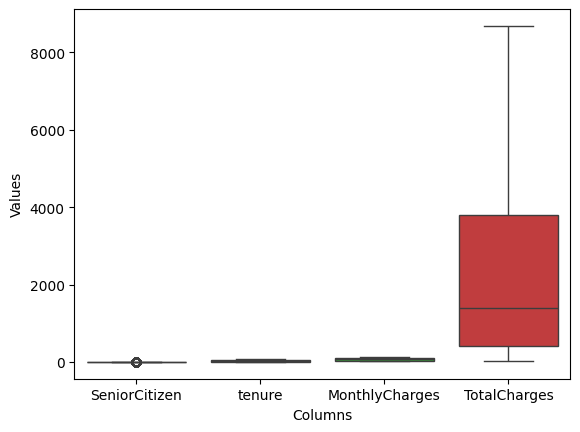

In [12]:
#Check for existing outliers in the numerical data
sns.boxplot(df)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

The outliers are in the Total Charges column 

In [13]:
#unique values in every column
object_columns = df.select_dtypes(include=['object'])

for col in object_columns.columns:
    print(f"{col} - {object_columns[col].nunique()} Unique Values")
    print(object_columns[col].unique())
    print()

# Convert Yes/No object columns to bool True/False
cols_to_convert = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in cols_to_convert:
    df[col] = df[col].map({'Yes': 1, 'No': 0}).astype(int)

# Relocate Churn (column  of interest) to front of dataframe for clarity
df.insert(0, 'Churn', df.pop('Churn'))

# Remaining object columns
object_columns = df.select_dtypes(include=['object'])
print("\nRemaining object columns after boolean conversions:")
print(object_columns.columns)


customerID - 7043 Unique Values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender - 2 Unique Values
['Female' 'Male']

Partner - 2 Unique Values
['Yes' 'No']

Dependents - 2 Unique Values
['No' 'Yes']

PhoneService - 2 Unique Values
['No' 'Yes']

MultipleLines - 3 Unique Values
['No phone service' 'No' 'Yes']

InternetService - 3 Unique Values
['DSL' 'Fiber optic' 'No']

OnlineSecurity - 3 Unique Values
['No' 'Yes' 'No internet service']

OnlineBackup - 3 Unique Values
['Yes' 'No' 'No internet service']

DeviceProtection - 3 Unique Values
['No' 'Yes' 'No internet service']

TechSupport - 3 Unique Values
['No' 'Yes' 'No internet service']

StreamingTV - 3 Unique Values
['No' 'Yes' 'No internet service']

StreamingMovies - 3 Unique Values
['No' 'Yes' 'No internet service']

Contract - 3 Unique Values
['Month-to-month' 'One year' 'Two year']

PaperlessBilling - 2 Unique Values
['Yes' 'No']

PaymentMethod - 4 Unique Values
['Electronic check' 'Mai

In [14]:
#Encoding data
def change_code(df_encode):
  """Changes all yes/no values in a dataframe to 1/0

  Args:
      df: A pandas dataframe

  Returns:
      A pandas dataframe with yes/no values changed to 1/0
  """
  df_encode.loc[df_encode[col] == 'yes', col] = 1
  df_encode.loc[df_encode[col] == 'no', col] = 0
  return df_encode


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [16]:
df.head(10)

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85
1,0,5575-GNVDE,Male,0,0,0,34,1,No,DSL,...,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50
2,1,3668-QPYBK,Male,0,0,0,2,1,No,DSL,...,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15
3,0,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,...,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75
4,1,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,...,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65
5,1,9305-CDSKC,Female,0,0,0,8,1,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50
6,0,1452-KIOVK,Male,0,0,1,22,1,Yes,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40
7,0,6713-OKOMC,Female,0,0,0,10,0,No phone service,DSL,...,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90
8,1,7892-POOKP,Female,0,1,0,28,1,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05
9,0,6388-TABGU,Male,0,0,1,62,1,No,DSL,...,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95


### Data Visualization

In [4]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

26.5% of customers unsubscribed from the company's services. 

In [5]:
df['Churn'][df['Churn']=="No"].groupby(by=df["gender"]).count()

gender
Female    2549
Male      2625
Name: Churn, dtype: int64

In [6]:
df['Churn'][df['Churn']=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

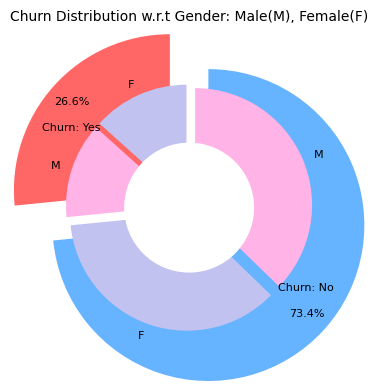

In [13]:
# Reduced figure size
plt.figure(figsize=(4, 4))  # smaller figure

labels = ["Churn: Yes", "Churn: No"]
values = [1869, 5163]
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [939, 930, 2544, 2619]

colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode = (0.2, 0.2)
explode_gender = (0.05, 0.05, 0.05, 0.05)

# Smaller font for smaller figure
textprops = {"fontsize":8}

# Outer Pie
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=0.85, labeldistance=0.6,
        colors=colors, startangle=90, frame=True, explode=explode,
        radius=1.2, textprops=textprops, counterclock=True)

# Inner Pie
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender,
        startangle=90, explode=explode_gender, radius=0.9,
        textprops=textprops, counterclock=True)

# Center circle (for donut effect)
centre_circle = plt.Circle((0, 0), 0.5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=10, y=1.05)
plt.tight_layout()
plt.show()

The number of customers who left the company was not affected by gender as they acted almost the same regardless of either male or female. 

In [15]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers who were using monthly subscriptions were more likely to leave as compared to those who had either 1-year or 2-year contract. Mathematically, about 75% of customers who were on monthly subscription churned as compared to approximately 13% who were on 1-year contract and 0.03% on 2-year contract respectively. 

In [17]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values = values, hole=.3)])
fig.update_layout(title_text = "<b>Payment Distribution Method</b>")
fig.show()

Based on the dataset, 33.6% of the clients use Electronic payment method. Is there a correlation between the payment method used and the customers churning?

In [18]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

There is a correlation between customer churning and the payment method. Customers who used Electronic Check are more likely to unsubscribe as compared to customers under Mail Check, Bank Transfer and Automatic credit card deductions. 

In [19]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers who are senior citizens (1) are more likely to churn. This shows that age of the customers affects the rate of churning. 

In [20]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In the instance of lack of online security, more customers are likely to churn. 

In [21]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="TechSupport", barmode="group", title="<b>Churn w.r.t Tech Support</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers who had no tech support were more likely to unsubscribe. This shows that tech support is needed to retain customers in some businesses. 

In [17]:
#Creating a copy of the data for encoding 
df1=df.copy()

## Label Encoding

In [18]:
df1['gender'].unique()


(array(['Female', 'Male'], dtype=object),)

In [19]:
label_encoder = LabelEncoder()

# Encode labels in column 'gender'. 
df1['gender']= label_encoder.fit_transform(df1['gender'])


In [20]:
#Checking if it has been encoded [gender]
df1['gender'].unique() 

array([0, 1])

In [25]:
#Encoding Contract variable 
#checking type 
df1['Contract'].unique()

array([0, 1, 2])

In [24]:
label_encoder = LabelEncoder()

# Encode labels in column 'gender'. 
df1['Contract']= label_encoder.fit_transform(df1['Contract'])


In [21]:
#To know which categorical data is given a 0 and a 1

##Get the unique classes/categories and their corresponding encoded values
encoded_classes = label_encoder.classes_
encoded_values = label_encoder.transform(encoded_classes)

# Print out the mapping of categories to encoded values
for category, encoded_value in zip(encoded_classes, encoded_values):
    print(f"{category}: {encoded_value}")

Female: 0
Male: 1


In [27]:
# Regression Model to check the relationship between Churn, gender, contract and Phone service
# Extract features (independent variables) and target (dependent variable)
X = df1[['gender', 'PhoneService', 'Contract']]  
y = df1['Churn']  

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to your data
model.fit(X, y)

# Make predictions (optional)
# predictions = model.predict(X_new)  # X_new is a DataFrame or array-like structure of new data points

# Access coefficients and intercept (optional)
intercept = model.intercept_
coefficients = model.coef_

# Get the names of the features
feature_names = X.columns

# Construct the linear regression equation
equation = f"Churn = {intercept:.2f}"
for feature, coefficient in zip(feature_names, coefficients):
    equation += f" + {coefficient:.2f} * {feature}"

print("Linear Regression Equation:")
print(equation)

# Print coefficients and intercept
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Linear Regression Equation:
Churn = 0.40 + -0.01 * gender + 0.02 * PhoneService + -0.21 * Contract
Intercept: 0.396997648628986
Coefficients: [-0.00748807  0.01907858 -0.21011581]


In [28]:
#Logistic regression 

# Create a LogisticRegression object
logistic_model = LogisticRegression()

# Fit the model to your data
logistic_model.fit(X, y)

# Make predictions (optional)
# predictions = logistic_model.predict(X_new)  # X_new is a DataFrame or array-like structure of new data points

# Access coefficients and intercept (optional)
intercept_logistic = logistic_model.intercept_[0]
coefficients_logistic = logistic_model.coef_[0]

# Print coefficients and intercept
print("Intercept (Logistic Regression):", intercept_logistic)
print("Coefficients (Logistic Regression):", coefficients_logistic)


Intercept (Logistic Regression): -0.3844994077052956
Coefficients (Logistic Regression): [-0.04313816  0.1162353  -1.67941726]
